<a href="https://colab.research.google.com/github/jnetoass/kmeans/blob/main/cluster_consum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

In [ ]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
#init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [ ]:
! mkdir /content/.kaggle

In [ ]:
import json

token = {"username":"netoassunao","key":"947383512cf2cfd01f88b368b68752a7"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
#Configure the file
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d akram24/mall-customers -p /content

  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 1.23MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/mall-customers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/mall-customers')
zip_ref.close()

In [ ]:
data = pd.read_csv('/mall-customers/Mall_Customers.csv')

In [ ]:
dat = ff.create_table(data.head(10))
iplot(dat)

In [ ]:
# describing the data
desc = ff.create_table(data.describe().reset_index())
iplot(desc)

In [ ]:
fig = make_subplots(
    subplot_titles=("Distribuição de gastos", "Distribuição das idades"),
    rows=1, cols=2)
fig.add_trace(
   go.Violin(y=data['Annual Income (k$)'],points='all',box_visible=True,x0='Income', name='Income'),row=1, col=1)
### assign the chart to the figure
fig.update_layout(title={
        'text': "Distribuição do PH",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis=dict(
                            title='Distribuição',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
### show the plot
    
fig.add_trace(
     go.Violin(y=data['Age'],points='all',box_visible=True,x0='Age', name='Age'),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['female','male'], values=data['Genre'].value_counts(), pull=[0, 0.1])])
fig.update_layout(title={
        'text': "Distribuição do PH",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis=dict(
                            title='Distribuição',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
fig.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=data['Age'],
                                   xbins=dict( # bins used for histogram
                                   start=15,
                                   end=74,
                                   size=1)
)])
fig.update_layout(title={
        'text': "Distribuição da Idade",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis=dict(
                            title='Distribuição',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark",
                  bargap=0.2
                  )
fig.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=data['Annual Income (k$)'],
                                   xbins=dict( # bins used for histogram
                                   start=15,
                                   end=126,
                                   size=2)
)])
fig.update_layout(title={
        'text': "Distribuição da Gastos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis=dict(
                            title='Distribuição',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark",
                  bargap=0.2
                  )
fig.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=data['Spending Score (1-100)'],
                                   xbins=dict( # bins used for histogram
                                   start=1,
                                   end=99,
                                   size=1)
)])
fig.update_layout(title={
        'text': "Distribuição da Gastos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis=dict(
                            title='Contagem',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark",
                  bargap=0.2
                  )
fig.show()

In [ ]:
data['CustomerID']
data['Spending Score (1-100)']
data['Age']
data['Annual Income (k$)']
data['Genre']

In [ ]:
fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Age', values=data['Age']),
                              dict(label='Annual Income', values=data['Annual Income (k$)']),
                              dict(label='Spending Score', values=data['Spending Score (1-100)'])]))
fig.update_layout(title='teste',
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest',
                  template = "plotly_dark")

fig.show()

In [ ]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

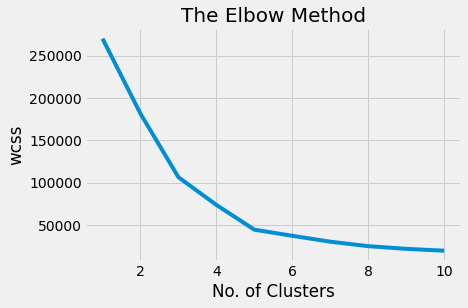

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x= x[y_means == 0, 0],
    y= x[y_means == 0, 1],
    name = 'Mediano',
    mode='markers'
    #hovertext= data5["Country"]
))
fig.add_trace(go.Scatter(
    x= x[y_means == 1, 0],
    y= x[y_means == 1, 1],
    name = 'Pirangueiro',
    mode='markers'
    #hovertext= data5["Country"]
))
fig.add_trace(go.Scatter(
    x= x[y_means == 2, 0],
    y= x[y_means == 2, 1],
    name = 'Cliente alvo',
    mode='markers'
    #hovertext= data5["Country"]
))
fig.add_trace(go.Scatter(
    x= x[y_means == 3, 0],
    y= x[y_means == 3, 1],
    name = 'Pobre',
    mode='markers'
    #hovertext= data5["Country"]
))
fig.add_trace(go.Scatter(
    x= x[y_means == 4, 0],
    y= x[y_means == 4, 1],
    name = 'Cauteloso',
    mode='markers'
    #hovertext= data5["Country"]
))
fig.add_trace(go.Scatter(
    x= km.cluster_centers_[:,0],
    y= km.cluster_centers_[:, 1],
    name = 'Centroide',
    mode='markers'
    #hovertext= data5["Country"]
))
fig.update_layout(title={
        'text': "Agrupamento de cientes",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  yaxis=dict(
                            title='Nota do comprador',
                            titlefont_size=16,
                            tickfont_size=14),
                  xaxis=dict(
                            title='Gasto anual',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
fig.show()